In [ ]:
import rioxarray 
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS



In [ ]:


# Load the NetCDF file using xarray
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")





In [ ]:
xds.data_vars

In [ ]:
# Set the CRS using rio.write_crs() for each data variable
for var in xds.data_vars:
    xds[var].rio.write_crs("EPSG:4326", inplace=True)


In [ ]:
xds

In [ ]:
xds.data_vars

In [ ]:
# Get projection information from WRF attributes
cen_lat = xds.attrs["CEN_LAT"]
cen_lon = xds.attrs["CEN_LON"]
truelat1 = xds.attrs["TRUELAT1"]
truelat2 = xds.attrs["TRUELAT2"]
stand_lon = xds.attrs["STAND_LON"]
print(f'''
    cen_lat: {cen_lat},
    cen_lon: {cen_lon},
    truelat1: {truelat1},
    truelat2: {truelat2},
    stand_lon: {stand_lon},
'''
)

In [ ]:
# Construct a CRS object
proj4_string = f"+proj=lcc +lat_1={truelat1} +lat_2={truelat2} +lat_0={cen_lat} +lon_0={cen_lon} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +ellps=WGS84 +no_defs"
original_crs = CRS.from_proj4(proj4_string)

In [ ]:
original_crs

In [ ]:
xds.rio.write_crs("EPSG:4326", inplace=True)  # WGS 84


In [ ]:
# Assuming 'lat2d' and 'lon2d' are the names of your spatial dimensions
xds = xds.rio.set_spatial_dims(x_dim='lon2d', y_dim='lat2d', inplace=True)


In [ ]:
data_wgs84 = xds.rio.reproject("EPSG:4326")


In [ ]:
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Assign the lon2d and lat2d as coordinates to the dataset
xds = xds.assign_coords(lon2d=xds['lon2d'], lat2d=xds['lat2d'])

# Set the spatial dimensions using rio.set_spatial_dims()
xds = xds.rio.set_spatial_dims(x_dim='lon2d', y_dim='lat2d', inplace=True)

# Write the original CRS based on the projection information
proj4_string = f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} +lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
original_crs = CRS.from_proj4(proj4_string)
xds.rio.write_crs(original_crs, inplace=True)

# Reproject the data to WGS 84
data_wgs84 = xds.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)

In [ ]:
# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing lat2d and lon2d
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values  # Select the first band
xlong = wrfinput['lon2d'].isel(band=0).values  # Select the first band

# Calculate the average across the 'day' dimension (or other relevant dimension)
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()  # Adjust the dimension name as needed

# Check the dimensions of the averaged variable and coordinates
print("Average variable dimensions:", average_variable.dims)
print("Lat/Lon shapes:", xlat.shape, xlong.shape)

# Create a DataArray with coordinates using lat2d and lon2d
average_variable_with_coords = xr.DataArray(
    average_variable.values,  # Use the numpy array from the average calculation
    coords={"lat2d": (["lat2d", "lon2d"], xlat), "lon2d": (["lat2d", "lon2d"], xlong)},
    dims=["lat2d", "lon2d"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} +lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Set spatial dimensions
average_variable_with_coords.rio.set_spatial_dims(x_dim='lon2d', y_dim='lat2d', inplace=True)

# Reproject to WGS84
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)

In [ ]:
xds

In [ ]:
wrfinput

In [ ]:


# Extract lat2d and lon2d from the wrfinput file 
xlat = wrfinput['lat2d'].values 
xlong = wrfinput['lon2d'].values  

# Calculate the average across the 'day' dimension (or other relevant dimension)
average_variable = dataset['etrans_sfc'].mean(dim='day').squeeze()  # Adjust the dimension name as needed

# Check the dimensions of the averaged variable and coordinates
print("Average variable dimensions:", average_variable.dims)
print("Lat/Lon shapes:", xlat.shape, xlong.shape)

# Create 1D arrays for latitude and longitude representing the edges of the grid
lat1d = xlat[:, 0]  # Take the first column for latitude
lon1d = xlong[0, :]  # Take the first row for longitude

# Create a DataArray with coordinates using the 1D lat and lon arrays
average_variable_with_coords = xr.DataArray(
    average_variable.values, 
    coords={"lat2d": ("lat2d", lat1d), "lon2d": ("lon2d", lon1d)},
    dims=["lat2d", "lon2d"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = f"+proj=lcc +lat_1={dataset.attrs['TRUELAT1']} +lat_2={dataset.attrs['TRUELAT2']} +lat_0={dataset.attrs['CEN_LAT']} +lon_0={dataset.attrs['CEN_LON']} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Set spatial dimensions
average_variable_with_coords.rio.set_spatial_dims(x_dim='lon2d', y_dim='lat2d', inplace=True)

# Reproject to WGS84 
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)



In [ ]:
import xarray as xr
import rioxarray

# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing XLAT and XLONG
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract XLAT and XLONG from the wrfinput file
xlat = wrfinput['lat2d'].values[0, :, :]  # Assuming the first time step or level if 3D
xlong = wrfinput['lon2d'].values[0, :, :]

# Calculate the average across the 'day' dimension (or other relevant dimension)
average_variable = xds['etrans_sfc'].mean(dim='day')  # Adjust the dimension name as needed

# Create a DataArray with coordinates using XLAT and XLONG
average_variable_with_coords = xr.DataArray(
    average_variable,
    coords={"lat2d": (["lat2d", "lon2d"], xlat), "lon2d": (["lat2d", "lon2d"], xlong)},
    dims=["lat2d", "lon2d"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} +lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Reproject to WGS84
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:
# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values
xlong = wrfinput['lon2d'].isel(band=0).values

# Calculate the average across the 'day' dimension
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Ensure the dimensions and coordinates align
if average_variable.shape != xlat.shape:
    raise ValueError("Mismatch between average_variable and coordinate shapes")

# Manually create an affine transform based on the lat/lon data
dx = (xlong.max() - xlong.min()) / (xlong.shape[1] - 1)
dy = (xlat.max() - xlat.min()) / (xlat.shape[0] - 1)

transform = Affine.translation(xlong.min(), xlat.max()) * Affine.scale(dx, -dy)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = (
    f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} "
    f"+lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 "
    "+ellps=WGS84 +datum=WGS84 +units=m +no_defs"
)

# Create a DataArray with coordinates and apply the transform manually
average_variable_with_coords = xr.DataArray(
    average_variable,
    coords={"y": (["y", "x"], xlat), "x": (["y", "x"], xlong)},
    dims=["y", "x"]
)

# Assign CRS and transform
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)
average_variable_with_coords.rio.write_transform(transform, inplace=True)

# Reproject to WGS84
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")


In [ ]:
import xarray as xr
import rioxarray
from affine import Affine

# Load the main dataset (etrans_sfc)
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing lat2d and lon2d
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc")

# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values
xlong = wrfinput['lon2d'].isel(band=0).values

# Calculate the average across the 'day' dimension
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Ensure the dimensions and coordinates align
if average_variable.shape != xlat.shape:
    raise ValueError("Mismatch between average_variable and coordinate shapes")

# Assign WGS84 to lat2d and lon2d
lat_wgs84 = xr.DataArray(xlat, dims=["y", "x"])
lon_wgs84 = xr.DataArray(xlong, dims=["y", "x"])

# Manually create an affine transform based on the lat/lon data
dx = (xlong.max() - xlong.min()) / (xlong.shape[1] - 1)
dy = (xlat.max() - xlat.min()) / (xlat.shape[0] - 1)
transform = Affine.translation(xlong.min(), xlat.max()) * Affine.scale(dx, -dy)

# Set the CRS for the dataset
proj4_string = "EPSG:4326"

# Create a DataArray with coordinates and apply the transform manually
average_variable_with_coords = xr.DataArray(
    average_variable,
    coords={"y": lat_wgs84, "x": lon_wgs84},
    dims=["y", "x"]
)

# Assign CRS and transform
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)
average_variable_with_coords.rio.write_transform(transform, inplace=True)

# Reproject to WGS84 (this may already be in WGS84)
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:

# Define the custom Lambert Conformal Conic projection using pyproj
custom_crs = CRS.from_proj4(
    "+proj=lcc +lat_1=30 +lat_2=60 +lat_0=39.707462310791016 "
    "+lon_0=-114.64297485351562 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
)

# Apply the CRS to your dataset
xds = xds.rio.write_crs(custom_crs.to_string(), inplace=True)

# Reproject to a common CRS (e.g., WGS 84 / EPSG:4326)
reprojected_xds = xds.rio.reproject("EPSG:4326")

# Save the reprojected data as a GeoTIFF
reprojected_xds.rio.to_raster("reprojected_output.tif")

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
import numpy as np

# Open the NetCDF file
with rasterio.open(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc") as src:
    # Read the first band
    band1 = src.read(1)
    src_crs = src.crs  # Check if CRS is defined, or assign one
    transform = src.transform
    print("Original CRS:", src_crs)

# If the CRS is not defined or incorrect, set it manually
if src_crs is None:
    src_crs = CRS.from_proj4(
        "+proj=lcc +lat_1=30 +lat_2=60 +lat_0=39.707462 +lon_0=-114.642975 +datum=WGS84 +units=m +no_defs"
    )
    print("Setting custom CRS:", src_crs)


In [ ]:
# Define the target CRS (WGS84 / EPSG:4326)
dst_crs = CRS.from_epsg(4326)

# Calculate the transform and dimensions of the output
transform, width, height = calculate_default_transform(
    src_crs, dst_crs, src.width, src.height, *src.bounds
)


In [ ]:
# Create an array to hold the reprojected data
dest = np.zeros((height, width), dtype=band1.dtype)

# Reproject the data
reproject(
    source=band1,
    destination=dest,
    src_transform=transform,
    src_crs=src_crs,
    dst_transform=transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)


In [ ]:
# Save the reprojected data to a new GeoTIFF file
with rasterio.open(
    'reprojected_output.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=dest.dtype,
    crs=dst_crs,
    transform=transform,
) as dst:
    dst.write(dest, 1)


In [ ]:
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc")


In [ ]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import from_bounds
from rasterio.crs import CRS
import xarray as xr

average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Step 2: Load the lat/lon coordinates from the NetCDF file
lat = xds['lat2d'].values
lon = xds['lon2d'].values

# Check the shape of the latitude and longitude arrays
print("Latitude shape:", lat.shape)
print("Longitude shape:", lon.shape)

# Step 3: If lat/lon are 1D, create 2D grids
if len(lat.shape) == 1 or len(lon.shape) == 1:
    lon, lat = np.meshgrid(lon, lat)

# Step 4: Define the original CRS
src_crs = CRS.from_proj4(
    "+proj=lcc +lat_1=30 +lat_2=60 +lat_0=39.707462 +lon_0=-114.642975 +datum=WGS84 +units=m +no_defs"
)

# Step 5: Create a transform for the original grid
transform = from_bounds(
    lon.min(), lat.min(), lon.max(), lat.max(),
    lon.shape[1], lat.shape[0]
)

# Step 6: Set up the destination CRS (WGS84 / EPSG:4326)
dst_crs = CRS.from_epsg(4326)

# Step 7: Calculate the transform and dimensions of the output
dst_transform, width, height = calculate_default_transform(
    src_crs, dst_crs, lon.shape[1], lat.shape[0], *rasterio.transform.array_bounds(lat.shape[0], lat.shape[1], transform)
)

# Step 8: Reproject the averaged data
dest = np.zeros((height, width), dtype=np.float32)

reproject(
    source=average_variable.values,
    destination=dest,
    src_transform=transform,
    src_crs=src_crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

# Step 9: Save the reprojected data as a GeoTIFF
with rasterio.open(
    'reprojected_average_output.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=dest.dtype,
    crs=dst_crs,
    transform=dst_transform,
) as dst:
    dst.write(dest, 1)


In [ ]:
# Select a variable for visualization
variable_name = 'etrans_sfc'  # Replace with your chosen variable

# Visualize the data
xds[variable_name].plot()
plt.show()

In [ ]:
# Load the NetCDF file using xarray
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\EEMS_Online_Model_Results_QlvBOBzadbQ9hXLR584QuRxKY5c6FyXd\data\results.nc", decode_coords="all")

# Set the CRS for each data variable if needed
for var in xds.data_vars:
    xds[var].rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
    xds.sortby(["x", "y"])
    xds[var].rio.write_crs("EPSG:32610", inplace=True)




In [ ]:


# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing XLAT and XLONG
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract XLAT and XLONG from the wrfinput file
xlat = wrfinput['lat2d'].values[0, :, :]  # Assuming the first time step or level if 3D
xlong = wrfinput['lon2d'].values[0, :, :]

# Calculate the average across the 'day' dimension (or other relevant dimension)
average_variable = xds['etrans_sfc'].mean(dim='day')  # Adjust the dimension name as needed

# Create a DataArray with coordinates using XLAT and XLONG
average_variable_with_coords = xr.DataArray(
    average_variable,
    coords={"lat2d": (["lat2d", "lon2d"], xlat), "lon2d": (["lat2d", "lon2d"], xlong)},
    dims=["lat2d", "lon2d"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} +lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Reproject to WGS84
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:
import xarray as xr
import rioxarray

# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing lat2d and lon2d
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values
xlong = wrfinput['lon2d'].isel(band=0).values

# Calculate the average across the 'day' dimension
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Ensure the dimensions and coordinates align
if average_variable.shape != xlat.shape:
    raise ValueError("Mismatch between average_variable and coordinate shapes")

# Create a DataArray with coordinates using lat2d and lon2d
average_variable_with_coords = xr.DataArray(
    average_variable,  # Use the numpy array from the average calculation
    coords={"y": (["y", "x"], xlat), "x": (["y", "x"], xlong)},
    dims=["y", "x"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = (
    f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} "
    f"+lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 "
    "+ellps=WGS84 +datum=WGS84 +units=m +no_defs"
)
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Set spatial dimensions
average_variable_with_coords.rio.set_spatial_dims(x_dim='x', y_dim='y', inplace=True)

# Calculate the transform explicitly if needed
# Assuming a simple transform; if the resolution is known, you can replace this with actual values
transform = Affine.translation(xlong.min(), xlat.min()) * Affine.scale(
    (xlong.max() - xlong.min()) / (xlong.shape[1] - 1),  # dx
    (xlat.max() - xlat.min()) / (xlat.shape[0] - 1)  # dy
)
average_variable_with_coords.rio.write_transform(transform)

# Try reprojecting again
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:
from affine import Affine

# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing lat2d and lon2d
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values
xlong = wrfinput['lon2d'].isel(band=0).values

# Calculate the average across the 'day' dimension
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Ensure the dimensions and coordinates align
if average_variable.shape != xlat.shape:
    raise ValueError("Mismatch between average_variable and coordinate shapes")

# Manually create an affine transform based on the lat/lon data
dx = (xlong.max() - xlong.min()) / (xlong.shape[1] - 1)
dy = (xlat.max() - xlat.min()) / (xlat.shape[0] - 1)

transform = Affine.translation(xlong.min(), xlat.max()) * Affine.scale(dx, -dy)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = (
    f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} "
    f"+lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 "
    "+ellps=WGS84 +datum=WGS84 +units=m +no_defs"
)

# Create a DataArray with coordinates and apply the transform manually
average_variable_with_coords = xr.DataArray(
    average_variable,
    coords={"y": (["y", "x"], xlat), "x": (["y", "x"], xlong)},
    dims=["y", "x"]
)

# Assign CRS and transform
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)
average_variable_with_coords.rio.write_transform(transform, inplace=True)

# Reproject to WGS84
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:
from affine import Affine

# Load the main dataset
xds = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc", decode_coords="all")

# Load the wrfinput file containing lat2d and lon2d
wrfinput = xr.open_dataset(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc", engine='rasterio')

# Extract lat2d and lon2d from the wrfinput file and remove the 'band' dimension
xlat = wrfinput['lat2d'].isel(band=0).values
xlong = wrfinput['lon2d'].isel(band=0).values

# Calculate the average across the 'day' dimension
average_variable = xds['etrans_sfc'].mean(dim='day').squeeze()

# Ensure the dimensions and coordinates align
if average_variable.shape != xlat.shape:
    raise ValueError("Mismatch between average_variable and coordinate shapes")

# Create a DataArray with coordinates using lat2d and lon2d
average_variable_with_coords = xr.DataArray(
    average_variable,  # Use the numpy array from the average calculation
    coords={"y": (["y", "x"], xlat), "x": (["y", "x"], xlong)},
    dims=["y", "x"]
)

# Set the CRS based on the original Lambert Conformal projection
proj4_string = (
    f"+proj=lcc +lat_1={xds.attrs['TRUELAT1']} +lat_2={xds.attrs['TRUELAT2']} "
    f"+lat_0={xds.attrs['CEN_LAT']} +lon_0={xds.attrs['CEN_LON']} +x_0=0 +y_0=0 "
    "+ellps=WGS84 +datum=WGS84 +units=m +no_defs"
)
average_variable_with_coords.rio.write_crs(proj4_string, inplace=True)

# Set spatial dimensions correctly
average_variable_with_coords.rio.set_spatial_dims(x_dim='x', y_dim='y', inplace=True)

# Try reprojecting again
average_variable_wgs84 = average_variable_with_coords.rio.reproject("EPSG:4326")

# Save the averaged data as a single-band TIFF file with WGS84 projection
output_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\output_wgs84_average.tif"
average_variable_wgs84.rio.to_raster(output_file)


In [ ]:
wrf_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc"

In [ ]:
from netCDF4 import Dataset
from wrf import getvar
import numpy as np


In [ ]:
# Load the WRF dataset

ncfile = Dataset(wrf_file)



In [ ]:
ncfile

In [ ]:
etrans_sfc = getvar(ncfile, 'etrans_sfc')

In [ ]:
# Open the netCDF file
wrf_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc"
ncfile = Dataset(wrf_file, mode='r')

# Access the 'etrans_sfc' variable directly
etrans_sfc = ncfile.variables['etrans_sfc'][:]

# Compute the average across the time dimension (assuming 'day' is the time dimension)
etrans_sfc_avg = np.mean(etrans_sfc, axis=0)

# Extract latitude and longitude using wrf-python
lat, lon = latlon_coords(etrans_sfc_avg)

# Define the affine transformation (assuming lat/lon grid is regular)
transform = from_origin(lon[0,0], lat[0,0], lon[1,0] - lon[0,0], lat[0,1] - lat[0,0])

# Write to a GeoTIFF file
output_tif = "etrans_sfc_avg.tif"
with rasterio.open(
    output_tif,
    'w',
    driver='GTiff',
    height=etrans_sfc_avg.shape[0],
    width=etrans_sfc_avg.shape[1],
    count=1,
    dtype=etrans_sfc_avg.dtype,
    crs='EPSG:4326',
    transform=transform,
) as dst:
    dst.write(etrans_sfc_avg, 1)

# Close the netCDF file
ncfile.close()

In [ ]:



avg_var = to_np(var.mean(dim='day'))  # Average over time if needed

# Get the lat/lon coordinates
lats, lons = latlon_coords(var)

# Define the original CRS
cart_proj = get_cartopy(var)

# Calculate the transform for rasterio
transform = from_bounds(lons.min(), lats.min(), lons.max(), lats.max(), lons.shape[1], lats.shape[0])

# Define the destination CRS (WGS84)
dst_crs = rasterio.crs.CRS.from_epsg(4326)

# Create the destination array for reprojected data
dest = np.zeros((lats.shape[0], lons.shape[1]), dtype=np.float32)




In [ ]:
# Use rasterio to save the reprojected data to a GeoTIFF
with rasterio.open(
    'wrf_output.tif',
    'w',
    driver='GTiff',
    height=dest.shape[0],
    width=dest.shape[1],
    count=1,
    dtype=dest.dtype,
    crs=dst_crs,
    transform=transform,
) as dst:
    dst.write(avg_var, 1)

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as crs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Function to read metadata (similar to _metaread but adapted to your inputs)
def _metaread(filepath):
    data = xr.open_dataset(filepath)
    lat = data['lat2d'].values
    lon = data['lon2d'].values
    return lat, lon

# Load lat/lon from wrfinput_d02_coord.nc
lat_wrf, lon_wrf = _metaread(r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc")

# Load etrans_sfc dataset and calculate daily average
etrans_sfc_data = xr.open_dataset( r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc")
average_etrans_sfc = etrans_sfc_data['etrans_sfc'].mean(dim='day').squeeze()

# Assign lat/lon coordinates to the averaged data
coords = {'lat': (['lat2d','lon2d'], lat_wrf), 'lon': (['lat2d','lon2d'], lon_wrf)}
average_etrans_sfc = average_etrans_sfc.assign_coords(coords)

# Set Lambert Conformal CRS
proj4_string = f"+proj=lcc +lat_1=30 +lat_2=60 +lat_0=39.707462 +lon_0=-114.642975 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
src_crs = crs.LambertConformal(central_latitude=39.707462, central_longitude=-114.642975, standard_parallels=(30, 60))




In [ ]:
# Define the plotting parameters
levs = np.arange(0, 551, 25)
mycmap = ["white", "yellow", "green", "blue", "red", "purple", "magenta"]
norm = BoundaryNorm(levs, len(levs))
cmap = LinearSegmentedColormap.from_list("t2", mycmap, len(levs))

# Use Cartopy's built-in state boundaries instead of an external shapefile
states = NaturalEarthFeature(category="cultural", scale="50m", facecolor="none", name="admin_1_states_provinces_lines")

# Plot the data using Cartopy
cart_proj = crs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=500, subplot_kw={'projection': cart_proj})

# Title for the plot
ax.set_title('Average etrans_sfc [mm/day] for 2010')

# Plot the data
cs = ax.pcolormesh(average_etrans_sfc['lon'], average_etrans_sfc['lat'], average_etrans_sfc, cmap=cmap, norm=norm)

# Add state boundaries and coastlines
ax.add_feature(states, linewidth=0.8, edgecolor="k")
ax.coastlines('50m', linewidth=1, color="k")

# Set map extent (adjust as needed)
ax.set_extent([-160, -100, 10, 60])

# Add gridlines with labels
gl = ax.gridlines(crs=cart_proj, draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Colorbar
cax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
cb = fig.colorbar(cs, cax=cax, orientation="vertical", ticks=levs)
cb.ax.tick_params(labelsize=15, rotation=45)

# Show the plot
plt.show()

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Define file paths
wrfinput_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc"
etrans_sfc_file =  r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc"

# Load the wrfinput file (lat and lon data)
wrfinput = xr.open_dataset(wrfinput_file)
print("Variables in wrfinput_d02_coord.nc:")
print(wrfinput)

# Load the etrans_sfc data
etrans_sfc = xr.open_dataset(etrans_sfc_file)
print("\nVariables in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc:")
etrans_sfc


Variables in wrfinput_d02_coord.nc:
<xarray.Dataset> Size: 734kB
Dimensions:  (lat: 340, lon: 270)
Dimensions without coordinates: lat, lon
Data variables:
    lat2d    (lat, lon) float32 367kB ...
    lon2d    (lat, lon) float32 367kB ...
Attributes:
    Title:        WRF data latitude and longitude coordinates
    Conventions:  CF-1.7
    Institution:  UCLA Center for Climate Science
    Source:       https://dept.atmos.ucla.edu/alexhall/downscaling-cmip6

Variables in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc:


<xarray.Dataset> Size: 134MB
Dimensions:     (day: 365, lat2d: 340, lon2d: 270)
Coordinates:
  * day         (day) float64 3kB 2.01e+07 2.01e+07 ... 2.011e+07 2.011e+07
Dimensions without coordinates: lat2d, lon2d
Data variables:
    etrans_sfc  (day, lat2d, lon2d) float32 134MB ...
Attributes: (12/149)
    TITLE:                            OUTPUT FROM WRF V4.1.3 MODEL
    START_DATE:                      2011-07-07_00:00:00
    SIMULATION_START_DATE:           2010-08-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        271
    SOUTH-NORTH_GRID_DIMENSION:      341
    BOTTOM-TOP_GRID_DIMENSION:       40
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0

In [14]:
print("Checking variables in wrfinput_d02_coord.nc...")

# Check for the presence of XLAT, XLONG, and HGT
for var in ['XLAT', 'XLONG', 'HGT']:
    if var in wrfinput.variables:
        print(f"{var} is present in wrfinput_d02_coord.nc")
    else:
        print(f"{var} is NOT present in wrfinput_d02_coord.nc")


Checking variables in wrfinput_d02_coord.nc...
XLAT is NOT present in wrfinput_d02_coord.nc
XLONG is NOT present in wrfinput_d02_coord.nc
HGT is NOT present in wrfinput_d02_coord.nc


In [15]:
print("\nChecking variables in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc...")

# Check for the presence of XLAT, XLONG, and HGT
for var in ['XLAT', 'XLONG', 'HGT']:
    if var in etrans_sfc.variables:
        print(f"{var} is present in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc")
    else:
        print(f"{var} is NOT present in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc")


Checking variables in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc...
XLAT is NOT present in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc
XLONG is NOT present in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc
HGT is NOT present in etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc


In [16]:

# Load the wrfinput file
wrfinput_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc"
etrans_sfc_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc"


wrfinput = xr.open_dataset(wrfinput_file)
etrans_sfc = xr.open_dataset(etrans_sfc_file)

# Extract lat2d and lon2d
lat2d = wrfinput['lat2d'].values
lon2d = wrfinput['lon2d'].values

# Calculate the average across the 'day' dimension for etrans_sfc
average_etrans_sfc = etrans_sfc['etrans_sfc'].mean(dim='day').values


In [ ]:
average_etrans_sfc

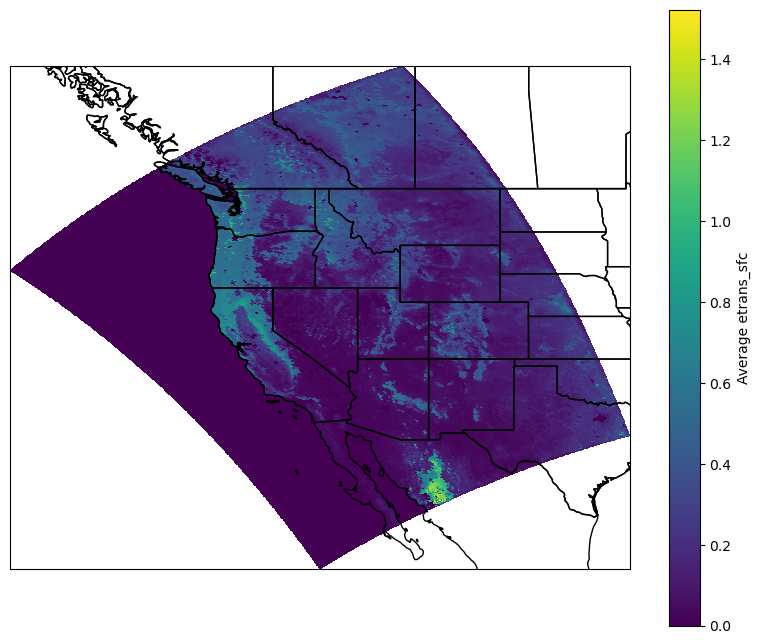

In [17]:
# Define the projection for the map 
projection = ccrs.PlateCarree()

# Create the plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

# Plot the etrans_sfc data using pcolormesh
cs = ax.pcolormesh(lon2d, lat2d, average_etrans_sfc, cmap='viridis', transform=projection)

# Add coastlines and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Add colorbar
plt.colorbar(cs, orientation='vertical', label='Average etrans_sfc')

# Show the plot
plt.show()


In [18]:

# Create a DataArray with the lat2d and lon2d as coordinates
data_with_coords = xr.DataArray(
    data=average_etrans_sfc,
    coords={"lat": (["lat", "lon"], lat2d), "lon": (["lat", "lon"], lon2d)},
    dims=["lat", "lon"]
)

# Set the CRS to WGS84 (EPSG:4326)
data_with_coords = data_with_coords.rio.write_crs("EPSG:4326")
data_with_coords.rio.set_spatial_dims(y_dim="lat", x_dim="lon", inplace=True)

# Save as GeoTIFF
output_file = 'output_average_etrans_sfc.tif'
data_with_coords.rio.to_raster(output_file)


TypeError: only length-1 arrays can be converted to Python scalars

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rioxarray
import numpy as np
import rasterio
from rasterio.transform import from_bounds
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata


In [2]:

# Load the wrfinput file
wrfinput_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\wrfinput_d02_coord.nc"
etrans_sfc_file = r"C:\Users\bsf31\Documents\post-meds\data\signal\etrans_sfc.daily.canesm5.r1i1p2f1.hist.bias-correct.d02.2010.nc"


wrfinput = xr.open_dataset(wrfinput_file)
etrans_sfc = xr.open_dataset(etrans_sfc_file)

# Extract lat2d and lon2d
lat2d = wrfinput['lat2d'].values
lon2d = wrfinput['lon2d'].values

# Calculate the average across the 'day' dimension for etrans_sfc
average_etrans_sfc = etrans_sfc['etrans_sfc'].mean(dim='day').values


In [3]:
# Create a regular lat-lon grid for interpolation
lat_interp = np.linspace(np.min(lat2d), np.max(lat2d), average_etrans_sfc.shape[0])
lon_interp = np.linspace(np.min(lon2d), np.max(lon2d), average_etrans_sfc.shape[1])

# Perform interpolation to the regular grid


lat_lon_points = np.array([lat2d.flatten(), lon2d.flatten()]).T
average_etrans_sfc_flat = average_etrans_sfc.flatten()

# Interpolating the data to the regular grid
grid_data = griddata(lat_lon_points, average_etrans_sfc_flat, (lat_interp[None, :], lon_interp[:, None]), method='linear')





In [ ]:
# Plotting on the interpolated grid
projection = ccrs.PlateCarree()

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
cs = ax.pcolormesh(lon_interp, lat_interp, grid_data, cmap='viridis', transform=projection)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
plt.colorbar(cs, orientation='vertical', label='Average etrans_sfc')
plt.show()

In [8]:
# Now save the interpolated data as a GeoTIFF
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data.shape[1], grid_data.shape[0])

# Save as GeoTIFF in WGS84
with rasterio.open('average_etrans_sfc_wgs84.tif', 'w', driver='GTiff',
                   height=grid_data.shape[0], width=grid_data.shape[1], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('GeoTIFF saved successfully.')

GeoTIFF saved successfully.


In [ ]:
""" # Swap the shape dimensions (grid_data.shape[1] and grid_data.shape[0])
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data.shape[0], grid_data.shape[1])

# Save the GeoTIFF with swapped dimensions
with rasterio.open('average_etrans_sfc_wgs84_corrected_swap_shape.tif', 'w', driver='GTiff',
                   height=grid_data.shape[1], width=grid_data.shape[0], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('GeoTIFF saved with swapped shape dimensions.') """

In [9]:
""" # Reverse the lat_interp array to see if the tilt gets corrected
lat_interp_reversed = lat_interp[::-1]

# Create the transform with the reversed lat_interp
transform = from_bounds(np.min(lon_interp), np.min(lat_interp_reversed), np.max(lon_interp), np.max(lat_interp_reversed), grid_data.shape[1], grid_data.shape[0])

# Save the GeoTIFF with reversed latitude
with rasterio.open('average_etrans_sfc_wgs84_corrected_reverse_lat.tif', 'w', driver='GTiff',
                   height=grid_data.shape[0], width=grid_data.shape[1], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('GeoTIFF saved with reversed latitude.') """


GeoTIFF saved with reversed latitude.


In [10]:
""" # Swap lat_interp and lon_interp in interpolation and transform
transform = from_bounds(np.min(lat_interp), np.min(lon_interp), np.max(lat_interp), np.max(lon_interp), grid_data.shape[1], grid_data.shape[0])

# Save the GeoTIFF with swapped lat/lon bounds
with rasterio.open('average_etrans_sfc_wgs84_corrected_swap_coords.tif', 'w', driver='GTiff',
                   height=grid_data.shape[0], width=grid_data.shape[1], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('GeoTIFF saved with swapped lat/lon coordinates.') """


GeoTIFF saved with swapped lat/lon coordinates.


In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from rasterio.transform import from_bounds


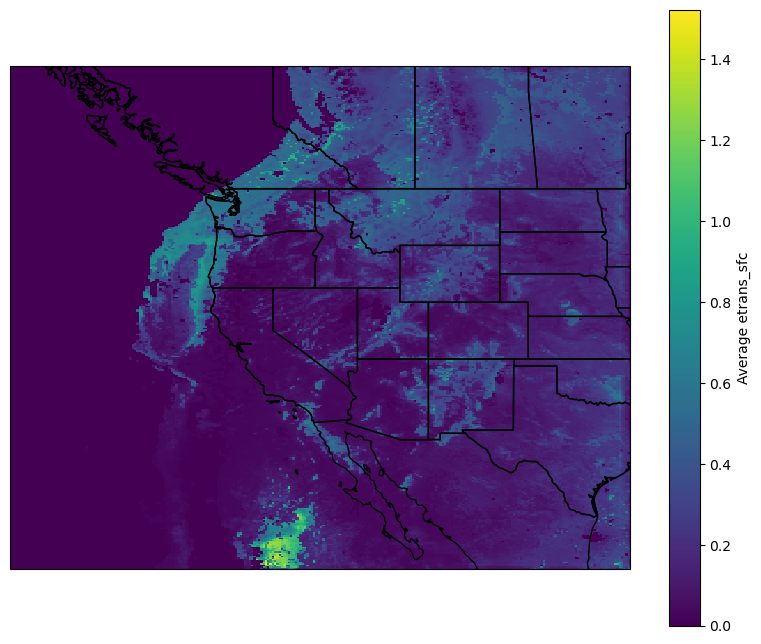

Reprojected GeoTIFF saved successfully.


In [8]:
""" # Create a target grid: regular lat/lon grid
lat_min, lat_max = np.min(lat2d), np.max(lat2d)
lon_min, lon_max = np.min(lon2d), np.max(lon2d)

# Create a regular lat-lon grid for reprojection
lat_interp = np.linspace(lat_min, lat_max, average_etrans_sfc.shape[0])
lon_interp = np.linspace(lon_min, lon_max, average_etrans_sfc.shape[1])

# Prepare the output array and metadata
grid_data = np.empty((len(lat_interp), len(lon_interp)), dtype=average_etrans_sfc.dtype)

# Define the original source transformation and CRS (assuming WGS84 for simplicity)
src_transform = from_bounds(lon_min, lat_min, lon_max, lat_max, average_etrans_sfc.shape[1], average_etrans_sfc.shape[0])
src_crs = 'EPSG:4326'  # Assuming PlateCarree projection uses WGS84

# Define the target transformation and CRS
dst_transform = from_bounds(lon_min, lat_min, lon_max, lat_max, len(lon_interp), len(lat_interp))
dst_crs = 'EPSG:4326'  # Target is WGS84 as well

# Reproject the data
reproject(
    source=average_etrans_sfc,
    destination=grid_data,
    src_transform=src_transform,
    src_crs=src_crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.bilinear
)

# Plot the reprojected data
projection = ccrs.PlateCarree()
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
cs = ax.pcolormesh(lon_interp, lat_interp, grid_data, cmap='viridis', transform=projection)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
plt.colorbar(cs, orientation='vertical', label='Average etrans_sfc')
plt.show()

# Now save the reprojected data as a GeoTIFF
transform = from_bounds(lon_min, lat_min, lon_max, lat_max, grid_data.shape[1], grid_data.shape[0])

# Save as GeoTIFF in WGS84
with rasterio.open('average_etrans_sfc_reprojected_wgs84.tif', 'w', driver='GTiff',
                   height=grid_data.shape[0], width=grid_data.shape[1], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('Reprojected GeoTIFF saved successfully.') """

In [8]:
""" # Create transform using the correct order for lon/lat (lon is x, lat is y)
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data.shape[1], grid_data.shape[0])

# Save the GeoTIFF
with rasterio.open('average_etrans_sfc_wgs84_corrected.tif', 'w', driver='GTiff',
                   height=grid_data.shape[0], width=grid_data.shape[1], count=1,
                   dtype=grid_data.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data, 1)

print('GeoTIFF saved successfully with correct lat/lon order.') """



GeoTIFF saved successfully with correct lat/lon order.


In [7]:
""" # Now save the interpolated data as a GeoTIFF
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data.shape[1], grid_data.shape[0])
# Create transform using the correct order for lon/lat (lon is x, lat is y)
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data.shape[1], grid_data.shape[0]) """


GeoTIFF saved with corrected projection.


In [3]:


# Create a regular lon-lat grid for interpolation (note the swapped order)
lon_interp = np.linspace(np.min(lon2d), np.max(lon2d), average_etrans_sfc.shape[1])
lat_interp = np.linspace(np.min(lat2d), np.max(lat2d), average_etrans_sfc.shape[0])

# Create a meshgrid for the new grid
lon_mesh, lat_mesh = np.meshgrid(lon_interp, lat_interp)

# Flatten the original lat/lon and data values for interpolation
lat_lon_points = np.array([lat2d.flatten(), lon2d.flatten()]).T
average_etrans_sfc_flat = average_etrans_sfc.flatten()

# Perform interpolation to the regular grid
grid_data = griddata(lat_lon_points, average_etrans_sfc_flat, (lat_mesh, lon_mesh), method='linear')

# Flip the grid data vertically to correct the upside-down orientation
grid_data_flipped = np.flipud(grid_data)

# Check if interpolation worked correctly
print("Interpolated grid shape:", grid_data_flipped.shape)

Interpolated grid shape: (340, 270)


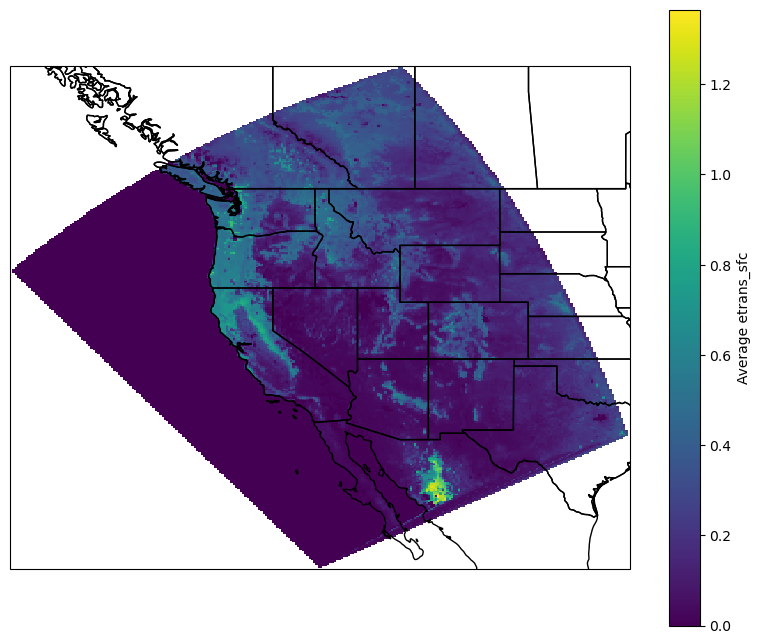

In [4]:
# Plotting on the interpolated grid
projection = ccrs.PlateCarree()

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)
cs = ax.pcolormesh(lon_mesh, lat_mesh, grid_data, cmap='viridis', transform=projection)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
plt.colorbar(cs, orientation='vertical', label='Average etrans_sfc')
plt.show()



In [5]:
# Save the interpolated data as a GeoTIFF with correct bounds
transform = from_bounds(np.min(lon_interp), np.min(lat_interp), np.max(lon_interp), np.max(lat_interp), grid_data_flipped.shape[1], grid_data_flipped.shape[0])

with rasterio.open('average_etrans_sfc_wgs84_fixed.tif', 'w', driver='GTiff',
                   height=grid_data_flipped.shape[0], width=grid_data_flipped.shape[1], count=1,
                   dtype=grid_data_flipped.dtype, crs='EPSG:4326', transform=transform) as dst:
    dst.write(grid_data_flipped, 1)

print('GeoTIFF saved successfully with corrected orientation.')

GeoTIFF saved successfully with corrected orientation.
